# TD braquage -- régression linéaire

### ***Chargement des données***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
braquage = np.load("braquage.npz")
print(braquage.files)

['braquage_consigne', 'braquage_reel']


In [3]:
bc = braquage[braquage.files[0]]
br = braquage[braquage.files[1]]

In [4]:
print("La dimension de la données bc est ",bc.shape)
print("La dimension de la données br est ",br.shape)

La dimension de la données bc est  (21,)
La dimension de la données br est  (21,)


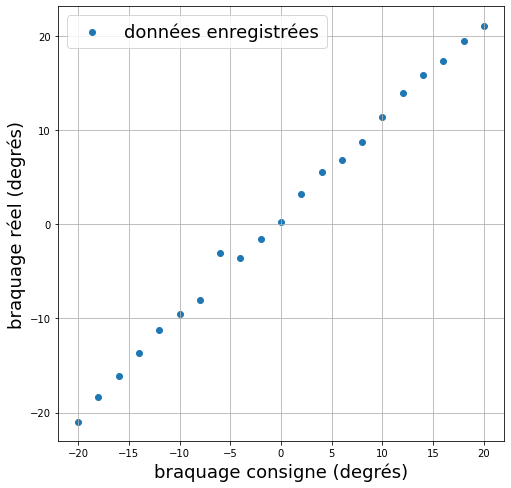

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(bc, br, label="données enregistrées")
plt.xlabel('braquage consigne (degrés)', fontsize=18)
plt.ylabel('braquage réel (degrés)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

###  ***Modélisation envisagée***  
La visualisation graphique des données invite à rechercher une modélisation de la relation 
entre le braquage réel $\boldsymbol{br}$ et le braquage consigne $\boldsymbol{bc}$
par une fonction affine : $$\boldsymbol{\hat{br}} = a\times\boldsymbol{bc}+b$$


***


### Recherche du modèle à partir de 2 couples de points expérimentaux
Puisque la famille des fonctions affines est paramétrée par 2 éléments $\Theta = (\,a\,,\,b\,)^T$ avec :
* $a$ : coefficient directeur de la droite
* $b$ : ordonnée à l'origine  

on peut déterminer ces éléments en utilisant uniquement 2 couples de points expérimentaux

Le modèle sera parfait pour ces 2 couples de données *(on peut toujours faire passer une droite par 2 points distincts)*  
Mais il est probable qu'il sera très mauvais vis-à-vis des autres points du jeu de données *(non utilisés pour ce calcul)* 

### Calcul du residu ###
$$error = \frac{1}{n} \sum_{i=1}^{n}{(br_{i} - hatbr_{i})^{2}} $$

## ***Approche géométrique***
### modèle 1 : avec les 2 points au centre

In [6]:
im, n = int(br.shape[0]/2), br.shape[0]
a1 = ( br[im] - br[im + 1] ) / ( bc[im]  - bc[im + 1])
b1 = br[im] - a1 * bc[im]
hatbr1 = a1 * bc + b1
residu1  = np.mean(np.square(br - hatbr1))

### modèle 2 : avec les 2 points à l'extrême négatif

In [7]:
a2 = ( br[0] - br[1] ) / ( bc[0]  - bc[1])
b2 = br[0] - a2 * bc[0]
hatbr2 = a2 * bc + b2
residu2  = np.mean(np.square(br - hatbr2))

### modèle 3 : avec les 2 points à l'extrême positif

In [8]:
a3 = ( br[-1] - br[-2] ) / ( bc[-1]  - bc[-2])
b3 = br[-1] - a3 * bc[-1]
hatbr3 = a3 * bc + b3
residu3  = np.mean(np.square(br - hatbr3))

### modèle 4 : avec les 2 points extrêmes

In [9]:
a4 = ( br[-1] - br[0] ) / ( bc[-1]  - bc[0])
b4 = br[-1] - a4 * bc[-1]
hatbr4 = a4 * bc + b4
residu4  = np.mean(np.square(br - hatbr4))

### visualisation graphique

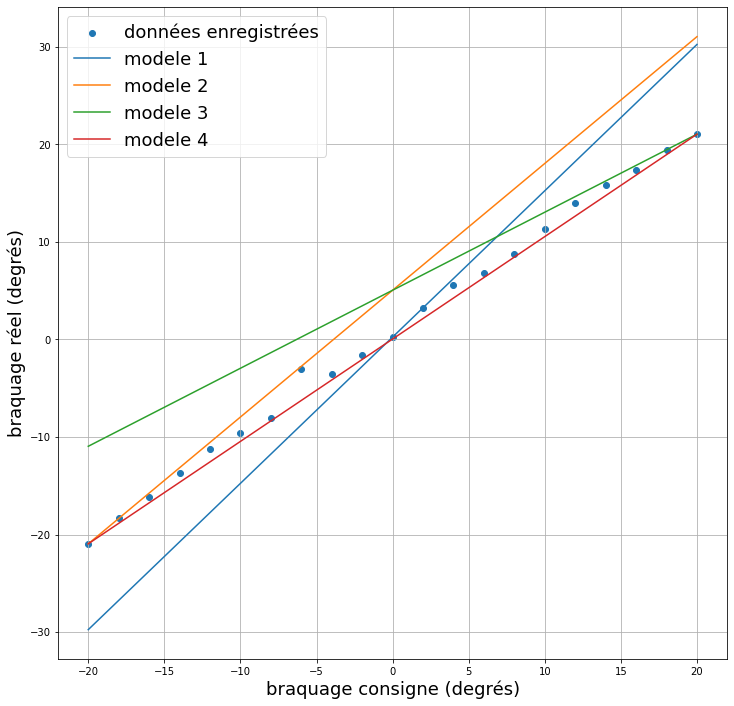

In [10]:
plt.figure(figsize=(12,12))
plt.scatter(bc, br, label="données enregistrées")
plt.xlabel('braquage consigne (degrés)', fontsize=18)
plt.ylabel('braquage réel (degrés)', fontsize=18)
plt.plot(bc, hatbr1, label="modele 1")
plt.plot(bc, hatbr2, label="modele 2")
plt.plot(bc, hatbr3, label="modele 3")
plt.plot(bc, hatbr4, label="modele 4")
plt.legend(fontsize=18)
plt.grid()
plt.show()

In [11]:
# Residues
print(f"le residue du modele 1 est: {residu1}")
print(f"le residue du modele 2 est: {residu2}")
print(f"le residue du modele 3 est: {residu3}")
print(f"le residue du modele 4 est: {residu4}")

le residue du modele 1 est: 31.065238095238083
le residue du modele 2 est: 27.69380952380926
le residue du modele 3 est: 27.05571428571455
le residue du modele 4 est: 1.0652380952380942


### Recherche du modèle en exploitant toutes les données
Si on recherche le modèle qui explique au mieux toutes les données :
* on ne peut plus espérer annuler toutes les erreurs *(puisque les données sont bruitées)*
* mais on sait calculer explicitement les paramètres qui minimisent l'erreur  

In [12]:
M, V = np.stack((bc, np.ones(n)), axis=1), br
aMC, bMC = list(np.linalg.pinv(M.T @ M) @ M.T @ V)
hatbrMC = aMC * bc + bMC
residuMC = np.mean(np.square(br - hatbrMC))

#### visualisation graphique

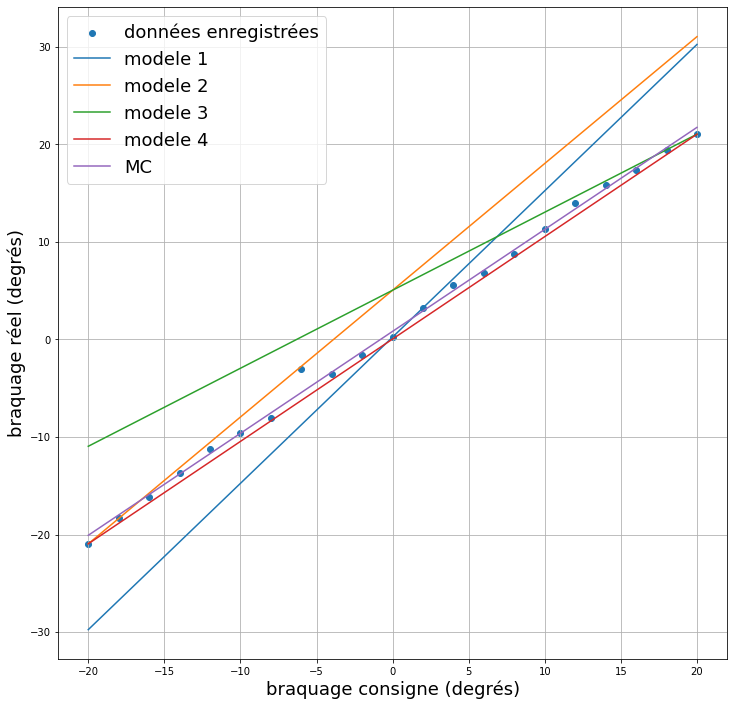

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(bc, br, label="données enregistrées")
plt.xlabel('braquage consigne (degrés)', fontsize=18)
plt.ylabel('braquage réel (degrés)', fontsize=18)
plt.plot(bc, hatbr1, label="modele 1")
plt.plot(bc, hatbr2, label="modele 2")
plt.plot(bc, hatbr3, label="modele 3")
plt.plot(bc, hatbr4, label="modele 4")
plt.plot(bc, hatbrMC, label="MC")
plt.legend(fontsize=18)
plt.grid()
plt.show()

In [14]:
# Residues
print(f"le residue du modele 1 est: {residu1}")
print(f"le residue du modele 2 est: {residu2}")
print(f"le residue du modele 3 est: {residu3}")
print(f"le residue du modele 4 est: {residu4}")
print(f"le residue du modele MC est: {residuMC}")

le residue du modele 1 est: 31.065238095238083
le residue du modele 2 est: 27.69380952380926
le residue du modele 3 est: 27.05571428571455
le residue du modele 4 est: 1.0652380952380942
le residue du modele MC est: 0.44511502782931356


##### Il convient d'enlever la donnée aberrante

In [15]:
bra = np.concatenate((br[:7], br[8:]))
bca = np.concatenate((bc[:7], bc[8:]))

In [16]:
M, V = np.stack((bca, np.ones(n-1)), axis=1), bra
aMCa, bMCa = list(np.linalg.pinv(M.T @ M) @ M.T @ V)
hatbrMCa = aMCa * bca + bMCa
residuMCa = np.mean(np.square(bra - hatbrMCa))

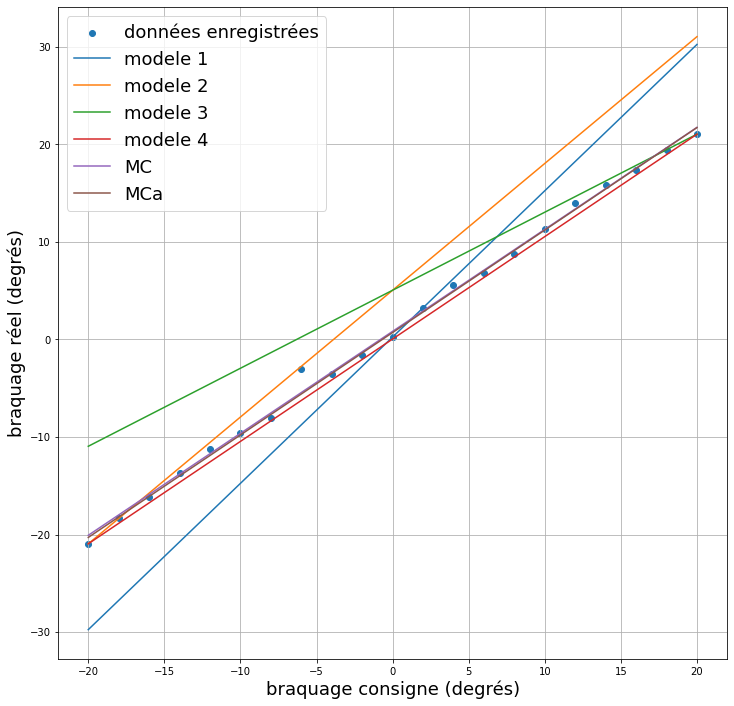

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(bc, br, label="données enregistrées")
plt.xlabel('braquage consigne (degrés)', fontsize=18)
plt.ylabel('braquage réel (degrés)', fontsize=18)
plt.plot(bc, hatbr1, label="modele 1")
plt.plot(bc, hatbr2, label="modele 2")
plt.plot(bc, hatbr3, label="modele 3")
plt.plot(bc, hatbr4, label="modele 4")
plt.plot(bc, hatbrMC, label="MC")
plt.plot(bca, hatbrMCa, label="MCa")
plt.legend(fontsize=18)
plt.grid()
plt.show()

In [18]:
# Residues
print(f"le residue du modele 1 est: {residu1}")
print(f"le residue du modele 2 est: {residu2}")
print(f"le residue du modele 3 est: {residu3}")
print(f"le residue du modele 4 est: {residu4}")
print(f"le residue du modele MC est: {residuMC}")
print(f"le residue du modele MCa est: {residuMCa}")

le residue du modele 1 est: 31.065238095238083
le residue du modele 2 est: 27.69380952380926
le residue du modele 3 est: 27.05571428571455
le residue du modele 4 est: 1.0652380952380942
le residue du modele MC est: 0.44511502782931356
le residue du modele MCa est: 0.16422115574255464



***


### Obtention du modèle via les fonctions dédiées *Numpy*, *SciPy*, *SkLearn*

La recherche de modèles pour décrire des données est un besoin récurrent. Aussi les packages scientifiques de Python proposent des fonctions dédiées qui:
* sont optimisées en terme d'efficacité du temps d'exécution
* renvoient également différents critères de performance sur la modélisation fournie
* offrent des paramètres supplémentaires pour par exemple traiter les conditionnements difficiles

#### avec la [fonction](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) `lstsq` de *Numpy*

In [19]:
resultat = np.linalg.lstsq(M,bra,rcond=None)
Theta4 = resultat[0]
residu4 = resultat[1]
print('En utilisant la fonction lstsq de Numpy, on obtient a = {:.4f} et b = {:.4f}'.format(Theta4[0],Theta4[1]))
print('et un résidu = {:.4f}'.format(residu4[0]/len(bca)))

En utilisant la fonction lstsq de Numpy, on obtient a = 1.0506 et b = 0.7148
et un résidu = 0.1642


#### avec la [fonction](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) `polyfit` de *Numpy*

In [20]:
resultat = np.polyfit(bca,bra,1,rcond=None,full=True)
Theta5 = resultat[0]
residu5 = resultat[1]
print('En utilisant la fonction polyfit de Numpy, on obtient a = {:.4f} et b = {:.4f}'.format(Theta5[0],Theta5[1]))
print('et un résidu = {:.4f}'.format(residu5[0]/len(bca)))

En utilisant la fonction polyfit de Numpy, on obtient a = 1.0506 et b = 0.7148
et un résidu = 0.1642


#### avec la [fonction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) `linregress` de *Scipy*

In [21]:
from scipy.stats import linregress
resultat = linregress(bca, bra)
print('En utilisant la fonction linregress de Scipy, on obtient a = {:.4f} et b = {:.4f}'.format(resultat[0],resultat[1]))
print('et un coefficient de détermination Rcarré = {:.4f}'.format((resultat[2])**2))

En utilisant la fonction linregress de Scipy, on obtient a = 1.0506 et b = 0.7148
et un coefficient de détermination Rcarré = 0.9990


In [22]:
brm = np.mean(bra)
bcm = np.mean(bca)
Ra = np.sum((bca - bcm) * (bra - brm)) / np.sqrt(np.sum(np.square(bra - brm))*np.sum(np.square(bca - bcm)))
print(f'coefficient R du MCa: {Ra}')

coefficient R du MCa: 0.9995112888415913


#### avec la [classe](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `LinearRegression` de *SkLearn*

Le coefficient de détermination R est : 0.9990
[[1.05059496]]
La pente a est 1.0506 : 
[0.71482151]
L'ordonnée à l'origine b est : 0.7148


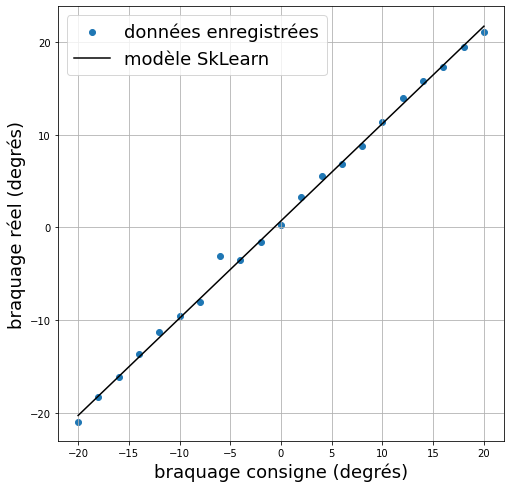

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(bca.reshape(-1, 1),bra.reshape(-1, 1))
Rcarre = model.score(bca.reshape(-1, 1),bra.reshape(-1, 1))
print('Le coefficient de détermination R est : {:.4f}'.format(Rcarre))
aLR = model.coef_
print(aLR)
print('La pente a est {:.4f} : '.format(aLR[0][0]))
bLR = model.intercept_
print(bLR)
print('L\'ordonnée à l\'origine b est : {:.4f}'.format(bLR[0]))

hatbrLR = model.predict(bca.reshape(-1, 1))
plt.figure(figsize=(8,8))
plt.scatter(bc, br, label="données enregistrées")
plt.plot(bca, hatbrLR, label="modèle SkLearn", c='k')
plt.xlabel('braquage consigne (degrés)', fontsize=18)
plt.ylabel('braquage réel (degrés)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()


***


### Sous-adaptation et sur-adaptation

On envisage ci-après différents modèles polynomiaux pour décrire le jeu de données créé ci-dessous

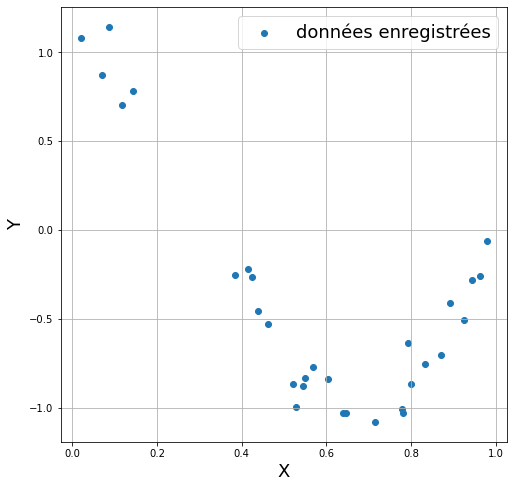

In [24]:
np.random.seed(0)
X = np.sort(np.random.rand(30))
Y = np.cos(1.5 * np.pi * X) + np.random.randn(30) * 0.1
plt.figure(figsize=(8,8))
plt.scatter(X, Y, label="données enregistrées")
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

#### calcul de la variance du jeu de données par rapport à sa moyenne 

In [25]:
SST = 0
for i in range(len(X)):
    SST += (Y[i]-np.mean(Y))**2

##### Métrique de performance d'un modèle affine

Le coefficient de détermination R pour un modèle affine est : 0.4737


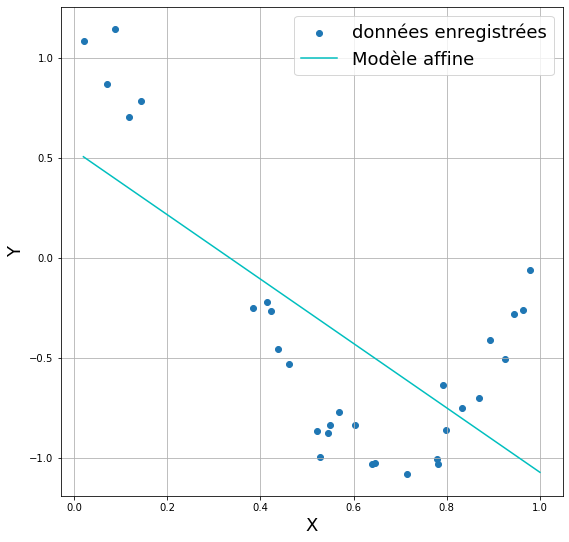

In [26]:
model1 = np.polyfit(X,Y,1)
hatY1 = np.poly1d(model1)
SSR1 = 0
for i in range(len(X)):
    SSR1 += (Y[i]-hatY1(X[i]))**2
print('Le coefficient de détermination R pour un modèle affine est : {:.4f}'.format(1-SSR1/SST))

plt.figure(figsize=(9,9))
plt.scatter(X, Y, label="données enregistrées")
XX = np.linspace(0.02,1,200)
plt.plot(XX,hatY1(XX),c='c',label='Modèle affine')
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

##### Métrique de performance d'un modèle polynomial d'ordre 4

Le coefficient de détermination R pour un modèle polynomial d'ordre 4 est : 0.9731


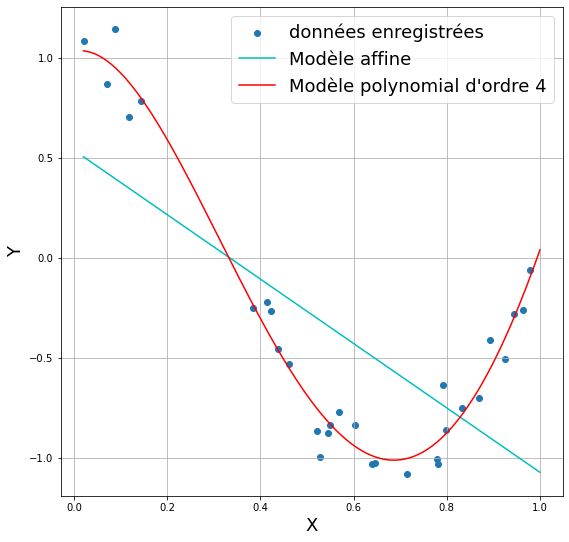

In [27]:
model4 = np.polyfit(X,Y,4)
hatY4 = np.poly1d(model4)
SSR4 = 0
for i in range(len(X)):
    SSR4 += (Y[i]-hatY4(X[i]))**2
print('Le coefficient de détermination R pour un modèle polynomial d\'ordre 4 est : {:.4f}'.format(1-SSR4/SST))

plt.figure(figsize=(9,9))
plt.scatter(X, Y, label="données enregistrées")
XX = np.linspace(0.02,1,200)
plt.plot(XX,hatY1(XX),c='c',label='Modèle affine')
plt.plot(XX,hatY4(XX),c='r',label='Modèle polynomial d\'ordre 4')
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

##### Métrique de performance d'un modèle polynomial d'ordre 15

Le coefficient de détermination R pour un modèle polynomial d'ordre 15 est : 0.9884


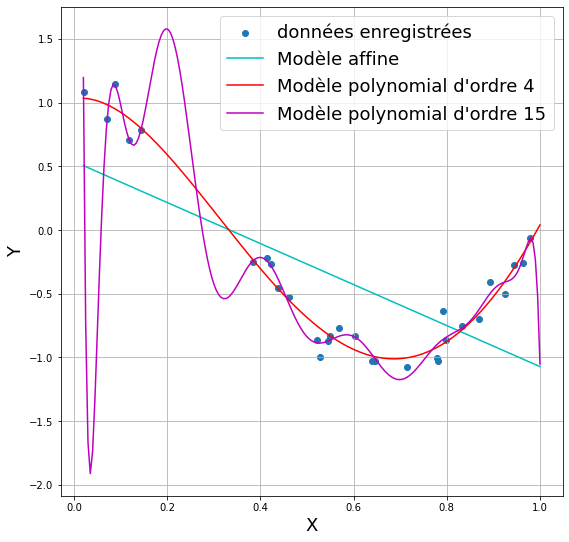

In [28]:
model15 = np.polyfit(X,Y,15)
hatY15 = np.poly1d(model15)
SSR15 = 0
for i in range(len(X)):
    SSR15 += (Y[i]-hatY15(X[i]))**2
print('Le coefficient de détermination R pour un modèle polynomial d\'ordre 15 est : {:.4f}'.format(1-SSR15/SST))

plt.figure(figsize=(9,9))
plt.scatter(X, Y, label="données enregistrées")
XX = np.linspace(0.02,1,200)
plt.plot(XX,hatY1(XX),c='c',label='Modèle affine')
plt.plot(XX,hatY4(XX),c='r',label='Modèle polynomial d\'ordre 4')
plt.plot(XX,hatY15(XX),c='m',label='Modèle polynomial d\'ordre 15')
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

En augmentant l'ordre du polynôme pour modéliser les données, on augmente les degrés de liberté du modèle,  
et dans le but de toujours faire baisser le résidu, ceux-ci finissent par être utilisés pour modéliser non seulement les données, mais aussi le bruit sur les données  
**-> un coefficient de détermination très proche de 1 n'est pas une assurance d'un modèle parfaitement approprié**  
Ce peut être un modèle sur-adapté, très précis sur les données *(grâce aux nombreux degrés de liberté du modèle)*, mais sans réalisme pour prédire d'autres valeurs. 